In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(1, 11, 1)
x_Sdagree = fuzz.trimf(x, [1, 1, 3])
x_dagree = fuzz.trimf(x, [1, 3, 5])
x_agree = fuzz.trimf(x, [3, 5, 7])
x_sagree = fuzz.trimf(x, [7, 10, 10])

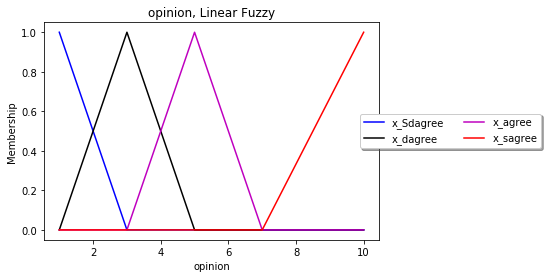

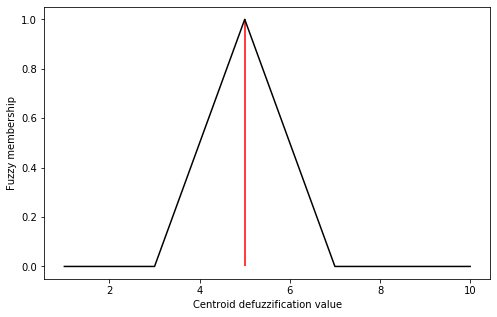

In [10]:
plt.figure()
plt.plot(x, x_Sdagree, 'b', linewidth=1.5, label='x_Sdagree')
plt.plot(x, x_dagree, 'k', linewidth=1.5, label='x_dagree')
plt.plot(x, x_agree, 'm', linewidth=1.5, label='x_agree')
plt.plot(x, x_sagree, 'r', linewidth=1.5, label='x_sagree')
plt.title('opinion, Linear Fuzzy')
plt.ylabel('Membership')
plt.xlabel('opinion')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5),ncol=2, fancybox=True, shadow=True);
defuzz_centroid = fuzz.defuzz(x, x_agree, 'centroid')
y=fuzz.interp_membership(x, x_agree, defuzz_centroid)
plt.figure(figsize=(8, 5))
plt.plot(x, x_agree, 'k')
plt.vlines(defuzz_centroid, 0, y, label='B', color='Red')
plt.ylabel('Fuzzy membership')
plt.xlabel('Centroid defuzzification value')
plt.show()

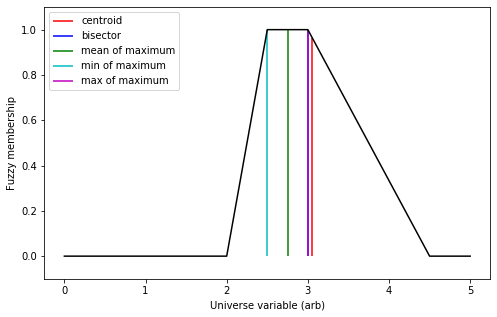

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()